Linear B-cell epitope detection

Problem Introduction:

The development of vaccines, diagnostic tools, and therapeutic interventions against a variety of illnesses, including infectious diseases, allergies, and some malignancies, depends on the identification of linear B-cell epitopes. However, the experimental search for these epitopes can be time and resource-consuming. Therefore, during the past few decades, computational techniques have been developed to assist in the prioritisation of possible epitopes for additional characterisation in the laboratory. The effectiveness of this process has significantly increased because of recent developments in computer techniques, making it more convenient and economical. This issue statement emphasises the significance of identifying linear B-cell epitopes, the difficulties in their experimental identification, and the possible advantages of computational techniques for quickening this process.

Data Overview:

The information relates to the epitope prediction for the Alphavirus family of mosquito-borne viruses, which includes the Chikungunya virus and other viruses that infect millions of people worldwide. Using research tools produced by the team at Aston University, the dataset was created by parsing and combining information received from three internet databases, namely IEDB, Genbank, and UniProtKB. To forecast brand-new, previously unidentified epitopes in viruses from the Alphavirus genus, I need to create an efficient data mining pipeline. The dataset contains details on host organisms, epitope sites, amino acid sequences, and other pertinent metadata.

The following Python packages have been utilized during various stages of the project.

NumPy: NumPy is a Python library used for scientific computing. It provides a powerful N-dimensional array object, as well as functions for performing mathematical operations on arrays.

Pandas: Pandas is a Python library that provides data structures for efficiently storing and manipulating large datasets.

Matplotlib: Matplotlib is a Python library used for creating static, animated, and interactive visualizations in Python.

The sklearn.model_selection module in scikit-learn provides various tools for model selection and evaluation, including functions for splitting datasets into training and testing sets. 

Boruta: Boruta is a feature selection library in Python that is used to select relevant features in a dataset for a given machine learning task.

RandomForestClassifier: RandomForestClassifier is a classification algorithm in scikit-learn that uses an ensemble of decision trees to classify data.

The imblearn.over_sampling module in imbalanced-learn provides various techniques for oversampling the minority class in imbalanced datasets.

sklearn.metrics: This is a package in scikit-learn that contains various metrics for evaluating the performance of machine learning models.

sklearn.model_selection: This is a package in scikit-learn that provides various tools for model selection and evaluation.

sklearn.pipeline: This is a package in scikit-learn that provides tools for constructing machine learning pipelines, which are a way to organize multiple steps in a machine learning workflow.

sklearn.preprocessing: This is a package in scikit-learn that provides various tools for preprocessing data before feeding it into a machine learning model.

## df_training_level1(1)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Exploratory Data Analysis and Pre-processing

EDA is the process of analyzing and understanding data to summarize its main characteristics and detect patterns, relationships, and anomalies. The goal of pre-processing is to ensure that the data is in a suitable format for analysis, and to reduce noise and bias that could affect the accuracy and generalizability of the results. Pre-processing steps can include handling missing data, dealing with outliers, scaling and normalizing data, encoding categorical variables, and feature engineering, among others.

Data Load:

This line of the below code reads a CSV file called "df_training_level1(1).csv" into a pandas DataFrame object called "df". read_csv() is a function in pandas that reads a CSV file and returns a DataFrame object containing the data.

In [3]:
df = pd.read_csv('df_training_level1(1).csv')

In [4]:
df.head()

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
0,CAA51871.1:2,12161,CAA51871.1,685,S,11458006,60725,10000000,2,0,...,0.178513,-0.257270,-0.153925,0.014767,-1.294921,-0.112832,0.260342,0.123651,0.159365,0.172829
1,CAA51871.1:2,12161,CAA51871.1,686,R,11458006,60725,10000000,2,0,...,0.539347,-0.173580,-0.122266,0.235858,-1.230598,-0.060592,0.160817,0.310983,0.146951,0.240393
2,CAA51871.1:2,12161,CAA51871.1,687,L,11458006,60725,10000000,2,0,...,0.224537,-0.165938,-0.125078,0.131652,-1.359426,0.020718,0.160984,0.189219,0.204018,0.336321
3,CAA51871.1:2,12161,CAA51871.1,688,L,11458006,60725,10000000,2,0,...,0.173186,-0.069608,-0.133053,0.043285,-1.559416,-0.032758,0.099643,0.117604,0.112384,0.367813
4,CAA51871.1:2,12161,CAA51871.1,689,E,11458006,60725,10000000,2,0,...,0.136331,-0.068715,0.032138,0.099051,-1.643639,-0.199724,0.076023,-0.128873,0.127291,0.278798


In [5]:
df.shape

(746, 1294)

In [6]:
df['Info_cluster'].value_counts()

204    516
298     69
229     54
320     42
199     30
215     20
264      8
256      7
Name: Info_cluster, dtype: int64

In [7]:
len(df['Info_cluster'].value_counts())

8

In [8]:
df_temp = df.copy()  # Make a copy of the original dataframe
df = df.drop(columns=df.filter(regex='^Info_'))  # Drop columns starting with 'Info_'
df['Info_cluster'] = df_temp['Info_cluster'] 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Columns: 1282 entries, Class to Info_cluster
dtypes: float64(1280), int64(2)
memory usage: 7.3 MB


Data Cleaning

Remove invalid observations in the data:

Data cleaning involves removing inaccurate observations from a dataset. Data points with missing, inaccurate, or inconsistent values are frequently considered invalid observations since they cannot be used for analysis. There may be columns in many datasets that provide broad details about the observations but are not specifically pertinent to the desired prediction or analysis. In this instance, these columns are known as metadata or descriptive data and their names begin with "Info_". Because they lack any significant predictive value, metadata and descriptive data are typically not helpful for modelling and prediction. Instead, they offer background and more details about the dataset's observations. The source of the data, the date it was obtained, or demographic details about the participants are a few examples of metadata columns.

In [10]:
df = df.dropna()

In [11]:
df = df.drop(columns='Info_cluster')

# Identify outliers using z-scores
z_scores = (df - df.mean()) / df.std()  # Calculate z-scores for each value in the dataframe
outliers = np.abs(z_scores) > 3  # Set threshold for outlier detection at 3 standard deviations from the mean
n_outliers = outliers.sum().sum()  # Count total number of True values in the dataframe

# Print the total number of outlier records
print("Total number of outlier records:", n_outliers)

Total number of outlier records: 3058


In [12]:
df.describe()

,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,...,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,0.225201,0.081334,0.155190,0.045183,0.093532,-0.187883,-0.079048,0.002961,-0.013465,-0.093546,...,0.082458,-0.026580,-0.052922,0.130508,-0.912585,-0.068948,0.098828,-0.005770,0.026254,0.234138
std,0.974966,0.134752,0.135894,0.153447,0.126711,0.150018,0.171420,0.171293,0.189475,0.146342,...,0.149778,0.133427,0.138832,0.141839,0.326053,0.151345,0.151581,0.145622,0.148122,0.159960
min,-1.000000,-0.605968,-0.368321,-0.453714,-0.270026,-0.623107,-0.587313,-0.546888,-0.428600,-0.537224,...,-0.252364,-0.426012,-0.438437,-0.298351,-1.749543,-0.402438,-0.344357,-0.456177,-0.401215,-0.326890
25%,-1.000000,-0.005342,0.056017,-0.045173,0.007387,-0.283482,-0.200325,-0.115509,-0.157970,-0.188088,...,-0.025213,-0.118891,-0.141919,0.036957,-1.142586,-0.176104,0.003478,-0.091283,-0.083311,0.135777
50%,1.000000,0.093366,0.159134,0.050690,0.102058,-0.190992,-0.087125,-0.000722,-0.023049,-0.095882,...,0.070693,-0.026712,-0.052635,0.129109,-0.929380,-0.082213,0.099465,0.008209,0.022796,0.249037
75%,1.000000,0.177607,0.248278,0.140758,0.177299,-0.090165,0.035861,0.120766,0.114863,0.006965,...,0.179583,0.066112,0.049650,0.223102,-0.693119,0.009155,0.192338,0.099157,0.125548,0.340555
max,1.000000,0.431492,0.533593,0.464730,0.484326,0.291663,0.476413,0.527441,0.568731,0.384280,...,0.546722,0.349790,0.337160,0.576059,0.692667,0.447825,0.676943,0.343372,0.521267,0.624794


In [13]:
df['Class'].value_counts()

 1    457
-1    289
Name: Class, dtype: int64

In [14]:
clean_df = df

The below code block is performing outlier detection and removal in the clean_df DataFrame.

Next, a threshold of 3 standard deviations from the mean is set as the threshold for outlier detection. Any value in the DataFrame that has a z-score above this threshold is considered an outlier.

The np.where function is then used to find the indices of all the data points that have z-scores above the threshold.

Finally, the clean_df DataFrame is updated to remove any rows that contain an outlier.

Overall, the below code block is performing a common data cleaning step to remove outliers from a DataFrame that may negatively impact the analysis or modeling results.

In [15]:
# Calculate z-scores for each value in the dataframe
z_scores = (clean_df - clean_df.mean()) / clean_df.std()

# Set threshold for outlier detection at 3 standard deviations from the mean
threshold = 3

# Find the indices of all data points with z-scores above the threshold
outlier_indices = np.where(np.abs(z_scores) > threshold)

# Remove the rows with outlier indices
clean_df = clean_df[(z_scores <= threshold).all(axis=1)]

In [16]:
clean_df.shape

(286, 1281)

In [17]:
clean_df['Info_cluster'] = df_temp['Info_cluster']

The features dataframe is created by selecting all columns of the clean_df dataframe except for the 'Class' column. This is because 'Class' is the target variable that we are trying to predict, so we want to separate it from the other variables to be used as the target during model training.

The target series is created by selecting only the 'Class' column from the clean_df dataframe.

In [18]:
from sklearn.model_selection import train_test_split

# Create a dataframe of features by selecting all columns except for 'Class'
features = clean_df.iloc[:, clean_df.columns != 'Class']

# Create a series of the target variable ('Class')
target = clean_df['Class']

In the code below, the train_test_split function from the sklearn.model_selection package is being used to split the dataset into two sets: a training set and a testing set.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.2,
                                                    random_state=42)

In [20]:
X_train['Class'] = clean_df['Class']

In [21]:
X_train['Class'].value_counts()

 1    134
-1     94
Name: Class, dtype: int64

In [22]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [23]:
X_train_clean = X_train.drop(['Class', 'Info_cluster'], axis=1)

In [24]:
X_train_clean.head()

,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,feat_esm1b_9,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
244,0.233186,0.205879,0.087787,0.010214,-0.288821,-0.139800,0.007510,0.086230,-0.085637,0.147678,...,0.051967,0.007124,-0.034588,0.168150,-1.130909,-0.116927,0.127482,0.093444,0.058868,0.360519
61,0.055757,0.369110,-0.060843,0.241634,-0.204576,-0.343872,0.196596,0.191587,0.032379,0.039993,...,0.049512,0.015279,0.085996,0.253194,-1.096287,-0.206165,0.046195,0.120146,0.022065,0.432276
163,-0.057328,0.232387,0.351349,0.297257,-0.324487,-0.052465,0.109125,-0.099163,-0.013503,0.163332,...,-0.026349,-0.228668,-0.111712,0.115414,-1.054878,-0.332554,0.187835,-0.002159,0.286191,0.326535
249,0.077823,0.244874,0.038710,0.174485,-0.147916,-0.092489,0.139395,0.016404,-0.046938,-0.109215,...,-0.164557,0.042635,-0.045513,0.185466,-0.742485,-0.246150,0.204462,0.168001,-0.069805,0.331076
116,0.145469,0.083274,0.187002,-0.019862,-0.279790,-0.093475,0.042988,-0.004669,-0.107092,0.059543,...,-0.228307,0.027000,0.018809,0.298190,-1.241184,-0.221347,-0.025244,-0.247902,-0.111732,0.160511


In [25]:
X_train_clean.shape, y_train.shape

((228, 1280), (228,))

In [26]:
# Create a random forest classifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# Create a Boruta feature selector instance
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=3, random_state=1, two_step=False)

# Fit the Boruta selector to the training data
boruta_selector.fit(X_train_clean.values, y_train.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	101
Rejected: 	1171
Iteration: 	16 / 100
Confirmed: 

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=252, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x26E0A135E40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x26E0A135E40, two_step=False,
         verbose=3)

The code below is extracting the number of relevant features that were selected by the Boruta feature selection algorithm. The Boruta feature selection algorithm is a wrapper method that uses a random forest classifier to identify relevant features by comparing their importance to that of randomized shadow features. The output of this code shows the number of features that the algorithm identified as relevant for the prediction task.

In [27]:
n_relevant_features = boruta_selector.n_features_
print("Number of relevant features:", n_relevant_features)

Number of relevant features: 37


After performing feature selection using the Boruta algorithm, this code retrieves the names of the selected features from the cleaned training data (X_train_clean). The Boruta algorithm marks the selected features with a True value in the boruta_selector.support_ attribute.

In [28]:
# get selected features
sel_features = X_train_clean.columns[boruta_selector.support_].tolist()

# print selected features
print(sel_features)

['feat_esm1b_24', 'feat_esm1b_52', 'feat_esm1b_56', 'feat_esm1b_61', 'feat_esm1b_90', 'feat_esm1b_93', 'feat_esm1b_233', 'feat_esm1b_244', 'feat_esm1b_280', 'feat_esm1b_306', 'feat_esm1b_316', 'feat_esm1b_336', 'feat_esm1b_369', 'feat_esm1b_398', 'feat_esm1b_430', 'feat_esm1b_437', 'feat_esm1b_440', 'feat_esm1b_480', 'feat_esm1b_646', 'feat_esm1b_647', 'feat_esm1b_667', 'feat_esm1b_693', 'feat_esm1b_792', 'feat_esm1b_802', 'feat_esm1b_829', 'feat_esm1b_865', 'feat_esm1b_922', 'feat_esm1b_943', 'feat_esm1b_969', 'feat_esm1b_984', 'feat_esm1b_1019', 'feat_esm1b_1103', 'feat_esm1b_1125', 'feat_esm1b_1136', 'feat_esm1b_1185', 'feat_esm1b_1222', 'feat_esm1b_1267']


Imports the RandomOverSampler class from the imblearn package, which is used for oversampling the minority class in imbalanced datasets.

In [29]:
from imblearn.over_sampling import RandomOverSampler
X_train_clean = X_train_clean[sel_features]

In [30]:
X_train_clean.shape, y_train.shape

((228, 37), (228,))

In [31]:
y_train.value_counts()

 1    134
-1     94
Name: Class, dtype: int64

In the code below, RandomOverSampler is used to perform oversampling on the training data to balance the imbalanced classes. This technique generates synthetic samples for the minority class by randomly duplicating existing samples until both classes have equal representation.

In [32]:
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_clean, y_train)

In [33]:
X_train_resampled.shape, y_train_resampled.shape

((268, 37), (268,))

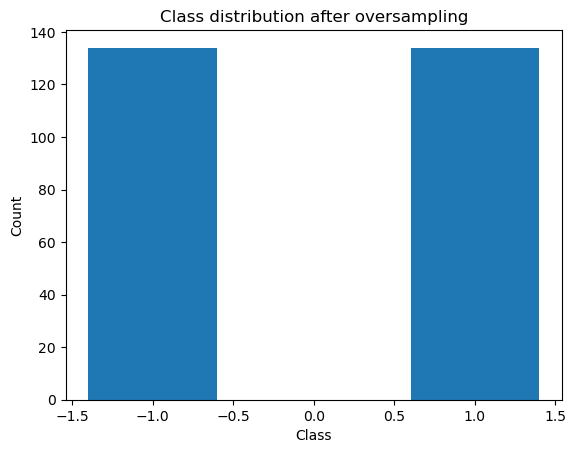

In [34]:
resampled_df = pd.concat([X_train_resampled, y_train_resampled], axis=1)

#get the count of each class
class_counts = resampled_df['Class'].value_counts()

#plot a bar graph
plt.bar(class_counts.index, class_counts.values)
plt.title('Class distribution after oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

The function scales the features using StandardScaler from sklearn.preprocessing. This is an important pre-processing step that standardizes the data by removing the mean and scaling to unit variance. The function then fits the model on the training data using model.fit and makes predictions on the testing data using model.predict. The function calculates the AUC score using roc_auc_score.

In [36]:
def evaluate_model(features, target, model):
    train_data, test_data, train_targets, test_targets = train_test_split(features,
                                                        target, 
                                                        test_size=.2,
                                                        random_state=42)
    
    scaler = StandardScaler()
    train_data = scaler.fit_transform(train_data)
    test_data = scaler.transform(test_data)
    
    model.fit(train_data, train_targets)
    pred = model.predict(test_data)
    auc_score = roc_auc_score(test_targets, pred)
    print(f"AUC score: {auc_score:.4f}")

A decision tree-based algorithm called the RandomForestClassifier, which can do both classification and regression tasks, is part of the pipeline. It scales the data to have a zero mean and unit variance.

A parameter grid is defined for the hyperparameters of the random forest classifier, including the number of trees, the maximum depth of the trees, and the criterion for splitting nodes. The GridSearchCV function is then used to search over the parameter grid using 5-fold cross-validation to find the best combination of hyperparameters that maximize the model performance.

The training data is oversampled using RandomOverSampler to address the issue of class imbalance. The oversampled data is used to train the model, and the performance is evaluated using the test set.

In [37]:
rf = RandomForestClassifier(random_state=42)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', rf)
])

param_grid = {
    'classifier__n_estimators': [100, 200, 500],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False],
    'classifier__criterion': ['gini', 'entropy', 'log_loss']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    pipe, param_grid, cv=5, n_jobs=-1
)

grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__max_depth': [10, 20, None],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 500]})

For df_training_level2(1):

This combination of hyperparameters achieved the highest score of 0.8434 in the GridSearchCV cross-validation. These hyperparameters were selected from a grid of different combinations by evaluating the performance of the model using 5-fold cross-validation. The best combination was selected based on the highest score achieved.

In [38]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'classifier__bootstrap': True, 'classifier__criterion': 'gini', 'classifier__max_depth': 20, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Best Score: 0.8433962264150944


In [39]:
best_params = grid_search.best_params_

In [40]:
best_params

{'classifier__bootstrap': True,
 'classifier__criterion': 'gini',
 'classifier__max_depth': 20,
 'classifier__max_features': 'log2',
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 100}

For df_training_level2(1):

the second model with an AUC score of 0.9146 is better than the first model with an AUC score of 0.7816. This is because the AUC score is a measure of how well the model can distinguish between positive and negative samples, with a higher score indicating better performance. Therefore, the second model with a higher AUC score is able to better distinguish between the positive and negative samples, indicating better predictive performance.

In [44]:
model = RandomForestClassifier(n_estimators=100)
evaluate_model(X_train_resampled, y_train_resampled, model)

AUC score: 0.7816


In [46]:
X_test_selected = X_test[sel_features]

In [47]:
X_test_selected.shape

(58, 37)

In [48]:
pred = model.predict(X_test_selected)

For df_training_level2(1):

The second score is better (0.739655921093443) because it is greater than 0.5. The higher the score, the better the model's ability to distinguish between positive and negative classes.

In [49]:
roc_auc_score(y_test, pred)

0.5

## df_training_level2(1)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [51]:
df = pd.read_csv('df_training_level2(1).csv')

In [52]:
df.head()

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_pubmed_id,Info_epitope_id,Info_host_id,Info_nPos,Info_nNeg,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
0,BAA01867.1:2,1678143,BAA01867.1,262,E,10449466,14543,9606,1,1,...,-0.070886,-0.017200,-0.117530,-0.007250,-1.071874,-0.519040,-0.308719,-0.281276,-0.256712,0.405690
1,BAA01867.1:2,1678143,BAA01867.1,263,T,10449466,14543,9606,1,1,...,0.220630,-0.210780,-0.021335,0.323588,-0.736865,-0.343829,-0.507386,-0.020137,-0.166644,0.751316
2,BAA01867.1:2,1678143,BAA01867.1,264,S,10449466,14543,9606,1,1,...,0.107350,-0.059491,-0.167905,0.257423,-0.930690,-0.271957,-0.133815,0.044392,-0.299376,0.461547
3,BAA01867.1:2,1678143,BAA01867.1,265,G,10449466,14543,9606,1,1,...,0.253621,-0.267090,-0.109026,0.091992,-0.813677,-0.187964,-0.142268,0.091157,-0.436975,0.369129
4,BAA01867.1:2,1678143,BAA01867.1,266,V,10449466,14543,9606,1,1,...,0.027382,0.018629,-0.157104,0.305302,-1.121274,-0.048636,-0.246171,0.147852,-0.299121,0.225209


In [53]:
df.shape

(4946, 1294)

In [54]:
df['Info_cluster'].value_counts()

34     1633
35     1623
150     564
204     516
36      244
298      69
229      54
232      45
198      43
320      42
39       33
199      30
215      20
222      15
264       8
256       7
Name: Info_cluster, dtype: int64

In [55]:
len(df['Info_cluster'].value_counts())

16

In [56]:
df_temp = df.copy()  # Make a copy of the original dataframe
df = df.drop(columns=df.filter(regex='^Info_'))  # Drop columns starting with 'Info_'
df['Info_cluster'] = df_temp['Info_cluster']

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4946 entries, 0 to 4945
Columns: 1282 entries, Class to Info_cluster
dtypes: float64(1280), int64(2)
memory usage: 48.4 MB


In [58]:
df = df.dropna()

In [59]:
df = df.drop(columns='Info_cluster')

# Identify outliers using z-scores
z_scores = (df - df.mean()) / df.std()  # Calculate z-scores for each value in the dataframe
outliers = np.abs(z_scores) > 3  # Set threshold for outlier detection at 3 standard deviations from the mean
n_outliers = outliers.sum().sum()  # Count total number of True values in the dataframe

# Print the total number of outlier records
print("Total number of outlier records:", n_outliers)

Total number of outlier records: 40957


In [60]:
df.describe()

,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
count,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,...,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000,4425.000000
mean,-0.520000,0.030755,0.147561,0.133156,0.056310,-0.135560,-0.072281,-0.133773,-0.022093,-0.165872,...,0.165610,-0.068945,-0.038972,0.059846,-0.868964,-0.141099,0.039288,0.009943,0.012112,0.253001
std,0.854263,0.174217,0.164273,0.183189,0.158925,0.171123,0.160774,0.183173,0.213266,0.194828,...,0.197846,0.161084,0.167719,0.167216,0.460807,0.163033,0.192016,0.159694,0.203489,0.213243
min,-1.000000,-0.864607,-0.728582,-0.746146,-0.932043,-0.791771,-0.670408,-0.817258,-1.082430,-0.933979,...,-0.557992,-0.744021,-0.792559,-0.810112,-1.842048,-0.720878,-0.728314,-0.713135,-1.084759,-0.984750
25%,-1.000000,-0.072870,0.052165,0.016922,-0.034153,-0.248429,-0.175112,-0.259029,-0.165915,-0.284678,...,0.039808,-0.174682,-0.144109,-0.039304,-1.179944,-0.249053,-0.091472,-0.075154,-0.115939,0.153016
50%,-1.000000,0.041457,0.153511,0.129611,0.061203,-0.138085,-0.075022,-0.135976,-0.023361,-0.172447,...,0.146975,-0.065006,-0.034378,0.066762,-0.937241,-0.153513,0.033876,0.022752,0.032889,0.272629
75%,-1.000000,0.150047,0.247211,0.246416,0.154601,-0.022724,0.031777,-0.014520,0.127583,-0.049705,...,0.261899,0.032938,0.074039,0.165388,-0.652044,-0.049282,0.164783,0.110488,0.154810,0.387973
max,1.000000,0.729142,1.169529,0.897457,0.947781,0.583465,0.699755,0.527441,0.803797,0.689671,...,1.554905,0.636953,0.585061,0.854849,1.567513,0.783904,0.743291,0.550096,0.640430,0.955284


In [61]:
df['Class'].value_counts()

-1    3363
 1    1062
Name: Class, dtype: int64

In [62]:
clean_df = df

In [63]:
# Calculate z-scores for each value in the dataframe
z_scores = (clean_df - clean_df.mean()) / clean_df.std()

# Set threshold for outlier detection at 3 standard deviations from the mean
threshold = 3

# Find the indices of all data points with z-scores above the threshold
outlier_indices = np.where(np.abs(z_scores) > threshold)

# Remove the rows with outlier indices
clean_df = clean_df[(z_scores <= threshold).all(axis=1)]

In [64]:
clean_df.shape

(2448, 1281)

In [65]:
clean_df['Info_cluster'] = df_temp['Info_cluster']

In [66]:
from sklearn.model_selection import train_test_split

# Create a dataframe of features by selecting all columns except for 'Class'
features = clean_df.iloc[:, clean_df.columns != 'Class']

# Create a series of the target variable ('Class')
target = clean_df['Class']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.2,
                                                    random_state=42)

In [68]:
X_train['Class'] = clean_df['Class']

In [69]:
X_train['Class'].value_counts()

-1    1407
 1     551
Name: Class, dtype: int64

In [70]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [71]:
X_train_clean = X_train.drop(['Class', 'Info_cluster'], axis=1)

In [72]:
X_train_clean.head()

,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,feat_esm1b_9,...,feat_esm1b_1270,feat_esm1b_1271,feat_esm1b_1272,feat_esm1b_1273,feat_esm1b_1274,feat_esm1b_1275,feat_esm1b_1276,feat_esm1b_1277,feat_esm1b_1278,feat_esm1b_1279
3975,0.050211,0.097243,0.079619,0.014110,0.038612,0.335759,-0.091919,-0.084824,-0.137887,0.068239,...,-0.053649,-0.105805,-0.249456,0.224054,-0.627018,-0.044531,0.211824,-0.199749,-0.039331,0.124213
173,-0.089267,0.032304,0.142255,-0.047216,-0.437265,-0.078436,-0.196060,-0.014184,-0.395557,-0.091702,...,0.147397,-0.209335,0.015844,0.101275,-1.485813,-0.272853,0.107751,0.067596,0.017883,0.224278
399,0.120327,0.155274,0.296128,-0.141289,-0.299129,0.019361,-0.116259,-0.009074,-0.132490,0.194819,...,0.137570,-0.079843,-0.037795,0.300911,-1.639716,-0.199560,0.032484,0.185506,0.064363,0.296593
3599,-0.100797,0.129846,0.444591,0.049932,-0.206813,0.117044,-0.109908,-0.279209,-0.314691,-0.049033,...,0.179443,-0.432061,0.011489,-0.119693,-1.208877,-0.414384,-0.010910,0.186598,0.174763,0.375242
4305,0.086014,0.149840,-0.100943,0.110624,-0.246441,-0.116427,-0.026956,-0.271807,-0.225726,-0.055780,...,0.198482,-0.120731,-0.014633,0.239760,-1.021704,-0.096593,-0.183278,-0.001779,0.096297,0.196827


In [73]:
X_train_clean.shape, y_train.shape

((1958, 1280), (1958,))

In [74]:
# Create a random forest classifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# Create a Boruta feature selector instance
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=3, random_state=1, two_step=False)

# Fit the Boruta selector to the training data
boruta_selector.fit(X_train_clean.values, y_train.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	1280
Rejected: 	0
Iteration: 	15 / 100
Confirmed: 	209
Tentative: 	519
Rejected: 	552
Iteration: 	16 / 100
Confirmed:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=619, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x26E0C8F7540),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x26E0C8F7540, two_step=False,
         verbose=3)

In [75]:
n_relevant_features = boruta_selector.n_features_
print("Number of relevant features:", n_relevant_features)

Number of relevant features: 310


In [76]:
# get selected features
sel_features = X_train_clean.columns[boruta_selector.support_].tolist()

# print selected features
print(sel_features)

['feat_esm1b_1', 'feat_esm1b_2', 'feat_esm1b_3', 'feat_esm1b_6', 'feat_esm1b_11', 'feat_esm1b_15', 'feat_esm1b_16', 'feat_esm1b_18', 'feat_esm1b_19', 'feat_esm1b_22', 'feat_esm1b_27', 'feat_esm1b_39', 'feat_esm1b_46', 'feat_esm1b_51', 'feat_esm1b_52', 'feat_esm1b_53', 'feat_esm1b_57', 'feat_esm1b_69', 'feat_esm1b_70', 'feat_esm1b_76', 'feat_esm1b_80', 'feat_esm1b_83', 'feat_esm1b_86', 'feat_esm1b_87', 'feat_esm1b_90', 'feat_esm1b_91', 'feat_esm1b_93', 'feat_esm1b_94', 'feat_esm1b_101', 'feat_esm1b_105', 'feat_esm1b_112', 'feat_esm1b_120', 'feat_esm1b_134', 'feat_esm1b_140', 'feat_esm1b_148', 'feat_esm1b_149', 'feat_esm1b_151', 'feat_esm1b_154', 'feat_esm1b_159', 'feat_esm1b_162', 'feat_esm1b_167', 'feat_esm1b_175', 'feat_esm1b_176', 'feat_esm1b_178', 'feat_esm1b_179', 'feat_esm1b_180', 'feat_esm1b_181', 'feat_esm1b_188', 'feat_esm1b_200', 'feat_esm1b_203', 'feat_esm1b_210', 'feat_esm1b_217', 'feat_esm1b_228', 'feat_esm1b_229', 'feat_esm1b_236', 'feat_esm1b_245', 'feat_esm1b_246', 'feat

In [77]:
from imblearn.over_sampling import RandomOverSampler
X_train_clean = X_train_clean[sel_features]

In [78]:
X_train_clean.shape, y_train.shape

((1958, 310), (1958,))

In [79]:
y_train.value_counts()

-1    1407
 1     551
Name: Class, dtype: int64

In [80]:
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_clean, y_train)

In [81]:
X_train_resampled.shape, y_train_resampled.shape

((2814, 310), (2814,))

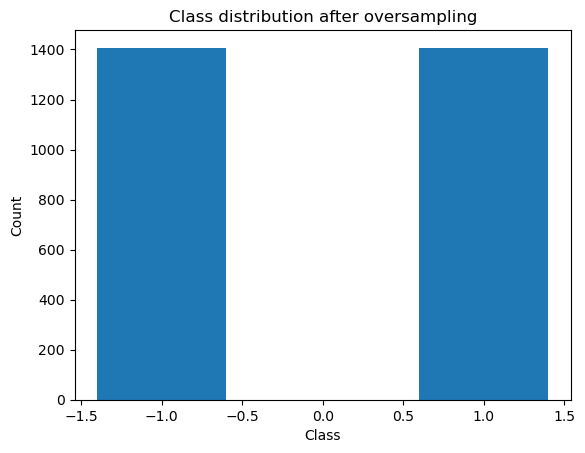

In [82]:
resampled_df = pd.concat([X_train_resampled, y_train_resampled], axis=1)

#get the count of each class
class_counts = resampled_df['Class'].value_counts()

#plot a bar graph
plt.bar(class_counts.index, class_counts.values)
plt.title('Class distribution after oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [84]:
def evaluate_model(features, target, model):
    train_data, test_data, train_targets, test_targets = train_test_split(features,
                                                        target, 
                                                        test_size=.2,
                                                        random_state=42)
    
    scaler = StandardScaler()
    train_data = scaler.fit_transform(train_data)
    test_data = scaler.transform(test_data)
    
    model.fit(train_data, train_targets)
    pred = model.predict(test_data)
    auc_score = roc_auc_score(test_targets, pred)
    print(f"AUC score: {auc_score:.4f}")

In [85]:
rf = RandomForestClassifier(random_state=42)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', rf)
])

param_grid = {
    'classifier__n_estimators': [100, 200, 500],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False],
    'classifier__criterion': ['gini', 'entropy', 'log_loss']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    pipe, param_grid, cv=5, n_jobs=-1
)

grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__max_depth': [10, 20, None],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 500]})

In [86]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'classifier__bootstrap': False, 'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best Score: 0.948478221019829


In [87]:
best_params = grid_search.best_params_

In [88]:
best_params

{'classifier__bootstrap': False,
 'classifier__criterion': 'entropy',
 'classifier__max_depth': None,
 'classifier__max_features': 'log2',
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 200}

In [89]:
model = RandomForestClassifier(n_estimators=100)
evaluate_model(X_train_resampled, y_train_resampled, model)

AUC score: 0.9146


In [90]:
X_test_selected = X_test[sel_features]

In [91]:
X_test_selected.shape

(490, 310)

In [92]:
pred = model.predict(X_test_selected)

In [93]:
roc_auc_score(y_test, pred)

0.739655921093443